THE PROBLEM OF PREDICTING THE BEST SELLERS AMONG DIFFERENT PRODUCTS

- clothes_puma.csv contains static data about products
- docs is a ReadMe
- evolutions_puma.csv contains evolution of products

Purpose of the case is (i) to identify best sellers, (ii) to build a model able to predict best sellers. 

In [1]:
'''
    -State the question and determine required data
    -Acquire the data in an accessible format
    -Identify and correct missing data points/anomalies as required
    -Prepare the data for the machine learning model
    -Establish a baseline model that you aim to exceed
    -Train the model on the training data
    -Make predictions on the test data
    -Compare predictions to the known test set targets and calculate performance metrics
    -If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
    Interpret model and report results visually and numerically
'''

'\n    -State the question and determine required data\n    -Acquire the data in an accessible format\n    -Identify and correct missing data points/anomalies as required\n    -Prepare the data for the machine learning model\n    -Establish a baseline model that you aim to exceed\n    -Train the model on the training data\n    -Make predictions on the test data\n    -Compare predictions to the known test set targets and calculate performance metrics\n    -If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique\n    Interpret model and report results visually and numerically\n'

In [2]:
'''
data exploration
'''
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
import time
from sklearn import preprocessing
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn import linear_model
%matplotlib inline

/home/fernsndo/.local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/fernsndo/.local/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/fernsndo/.local/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/fernsndo/.local/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/fernsndo/.local/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: Ru

/home/fernsndo/.local/lib/python2.7/site-packages/sklearn/utils/__init__.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/home/fernsndo/.local/lib/python2.7/site-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/home/fernsndo/.local/lib/python2.7/site-packages/sklearn/utils/extmath.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fast import csr_row_norms
/home/fernsndo/.local/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .expected_mutual_info_fast import expected_mutual_information
/home/fernsndo/.local/lib/python2.7/site-packages/sklearn/metric

# First we need to see the data that we have. 

So, as a very first step what I'm going to do is to read the data as csv files and then merge them so we'll end up with a dataframe that contains the information of products varying through time.

In [3]:
df1       = pd.read_csv('clothes_puma.csv')
#df1.head(5)
df2       = pd.read_csv('evolutions_puma.csv', sep=';', encoding='utf8', parse_dates=["timestamp"], index_col="timestamp")
df2       = pd.read_csv('evolutions_puma.csv', sep=';', encoding='utf8')
#df2.head(5)
df2       = df2.loc[:, ~df2.columns.str.contains('^Unnamed')] # to get rid of the Unnamed column, thanks to the ";" at the end

df_merged = pd.merge(df2, df1, on = "product_id")
#df_merged = pd.concat([df1, df2], axis=1, sort=False)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49318 entries, 0 to 49317
Data columns (total 10 columns):
product_id      49318 non-null object
color           49318 non-null object
timestamp       49318 non-null object
type            49318 non-null object
value           49318 non-null object
size_name       49318 non-null object
category        49318 non-null object
sub_category    49318 non-null object
main_title      49318 non-null object
colors          49318 non-null object
dtypes: object(10)
memory usage: 4.1+ MB


Now, what I'd like to do is to take a look at the data in its innitial form.

In [4]:
df_merged.head(20)

,product_id,color,timestamp,type,value,size_name,category,sub_category,main_title,colors
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20 00:00:00,position,1322,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21 00:00:00,position,1134,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22 00:00:00,position,1130,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23 00:00:00,position,1136,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24 00:00:00,position,1141,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25 00:00:00,position,1136,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26 00:00:00,position,1129,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27 00:00:00,position,1135,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28 00:00:00,position,1319,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29 00:00:00,position,1144,None,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"


There are two things that I would like to highlight about the data just with the first glance.
First, some features are lists. But it shouldn't be a problem for the algorithms that we will train.

Second, for the feature "type-value" I don't think this is a convenient way of representing it. So, it'll require manipulation with the dataframe to get it into a better shape.

Now, let's take a look at how is the "type-value" feature(s) distributed.

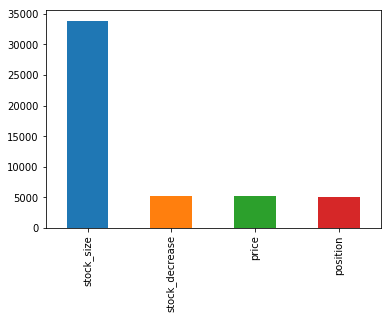

In [5]:
df_merged['type'].value_counts().plot(kind='bar')

So, given the plot above we can appreciate the quantity of "stock_size", "stock_decrease", "price", and "position" that the dataset contains

In [7]:
# If you would like to know the quantity of different colors in the dataset. 
#df_merged['color'].value_counts().plot(kind='bar')

In [8]:
#If you would like to know the quantity of different categories in the dataset.
#df_merged['category'].value_counts().plot(kind='bar')

In [9]:
# If you would like to know the quantity of different sub categories in the dataset.
#df_merged['sub_category'].value_counts().plot(kind='bar')

# Missing data

In the dataset the missing data is defined by the 'None' string, so I'd like to change that for the *conventional* None object usedn in numpy.

In [10]:
df_merged['product_id'].replace('None', np.nan, inplace= True)
df_merged['category'].replace('None', np.nan, inplace= True)
df_merged['sub_category'].replace('None', np.nan, inplace= True)
df_merged['main_title'].replace('None', np.nan, inplace= True)
df_merged['colors'].replace('None', np.nan, inplace= True)
df_merged['color'].replace('None', np.nan, inplace= True)
df_merged['timestamp'].replace('None', np.nan, inplace= True)
df_merged['type'].replace('None', np.nan, inplace= True)
df_merged['value'].replace('None', np.nan, inplace= True)
df_merged['size_name'].replace('None', np.nan, inplace= True)


df_merged.isnull().sum()

product_id          0
color               0
timestamp           0
type                0
value               2
size_name       15408
category            0
sub_category        0
main_title          0
colors              0
dtype: int64

The previous code also showed that the missing values are mainly for the column "size name". Which is logical, since this measures sizes such as L, M, etc. that it's not always available.

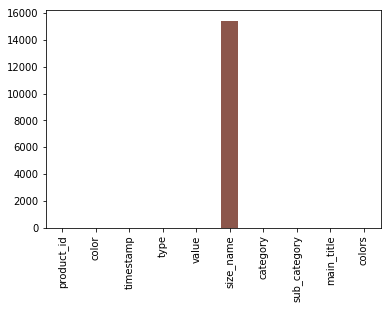

In [11]:
# basically all the missing data is in the last feature!
df_merged.isnull().sum().plot(kind='bar')


Let's study this more closely.

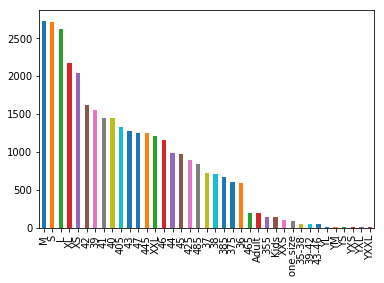

In [12]:
# for the size name the biggest quantity of vales goes to M.
#
#
df_merged['size_name'].value_counts().plot(kind='bar')


The previous plot showed the different sizes available in the dataset and how many they are.

But how many are they exactly?

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49318 entries, 0 to 49317
Data columns (total 10 columns):
product_id      49318 non-null object
color           49318 non-null object
timestamp       49318 non-null object
type            49318 non-null object
value           49316 non-null object
size_name       33910 non-null object
category        49318 non-null object
sub_category    49318 non-null object
main_title      49318 non-null object
colors          49318 non-null object
dtypes: object(10)
memory usage: 4.1+ MB


The quantity of missing values is 31.246% of your dataset,

this means that it is not recommendable to just drop those rows.

What we would like to do in here is to try to keep the rows and impute the column.

This can be done by calculating the average of the column values and then replacing the missing values by this mean value.

Although this sound like a good idea, you can see that it doesn't always make sense for some rows. For example, if the product is a shoe, and its size_name is missing, and then also, the mean value is the M size, putting M for that particular row would be a wrong conception of the product. 

Since the column size_name contains mainly missing data, it does not add much information, so I'll just drop that column.

In [16]:
df_merged = df_merged.drop(['size_name'], axis = 1)

This is fine, but we still have missing data.

In [17]:
df_merged.isnull().sum()

product_id      0
color           0
timestamp       0
type            0
value           2
category        0
sub_category    0
main_title      0
colors          0
dtype: int64

To use mean values for numeric columns and the most frequent value for non-numeric columns you could do something like 
this. You could further distinguish between integers and floats. I guess it might make sense to use the median for 
integer columns instead.
Impute missing values.

Columns of dtype object are imputed with the most frequent value in column.

Columns of other types are imputed with mean of column.

In [24]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """
            empty constructor for now.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
        


In [25]:
#Now we impute the remaining values for the dataset. 
df_merged = DataFrameImputer().fit_transform(df_merged)


In [26]:
df_merged.isnull().sum()

product_id      0
color           0
timestamp       0
type            0
value           0
category        0
sub_category    0
main_title      0
colors          0
dtype: int64

So, now we have a dataset free of missing values.

A little bit more about the dataset inttuition:
Titles seem to be a good way of representing the products.
We’re going to assume that in general a product’s title is a strong feature for best seller prediction.

In [28]:
df_merged['main_title'].value_counts()

\nSuede Classic+ Trainers\n                             6011
\nElsu v2 Canvas Trainers\n                             4145
\nEpic Flip v2 Sandals\n                                2039
\nBasket Platform Reset Women's Trainers\n              1695
\nActive Training Women's All Eyes On Me 34 Tights\n    1465
\nPacer Trainers\n                                      1362
\nIGNITE Limitless Men's Trainers\n                     1359
\nST Runner NL Trainers\n                               1346
\nActive Men's Evostripe SpaceKnit T-Shirt\n            1263
\nDescendant v4 Women's Running Shoes\n                 1233
\nBMW Motorsport Men's Summer Polo\n                     864
\nBVB Men's Fan T-Shirt\n                                831
\nBVB Stadium Jersey\n                                   828
\nStyle Men's Full Zip Fleece Hoodie\n                   769
\nTraining Essentials Women's Graphic Tank Top\n         768
\nRedon Move Slip-ons\n                                  763
\nWomen's Archive Logo T

# FEATURES



So far the data set as it is, it's not useful for our prediction.
First, we need to know when a product is a best seller, or not. 
I define best seller as those which have high stock_decrease in a short period of time.

If we define a new dataframe which has the following columns/features:

1) product id

2) category

3) sub_categorstock_decreasey

4) main_title

5) colors

6) color

7) timestamp       

8) position       (with its value as a datapoint)

9) price          (with its value as a datapoint)

10) stock_size     (with its value as a datapoint)

11) stock_decrease (with its value as a datapoint)

Then I can add a column to this dataframe that determines if the product (with product_id id0) was best seller or no

12) is_best_seller (boolean feature that tells you if product id0 is best seller 1 or no 0).



In [29]:
df_merged

,product_id,color,timestamp,type,value,category,sub_category,main_title,colors
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20 00:00:00,position,1322,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21 00:00:00,position,1134,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22 00:00:00,position,1130,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23 00:00:00,position,1136,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24 00:00:00,position,1141,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25 00:00:00,position,1136,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26 00:00:00,position,1129,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27 00:00:00,position,1135,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28 00:00:00,position,1319,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29 00:00:00,position,1144,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]"


In [30]:
df_merged.dtypes

product_id      object
color           object
timestamp       object
type            object
value           object
category        object
sub_category    object
main_title      object
colors          object
dtype: object

In the future would be useful to try to stablish some delta time. 
So, we assume that the starting date is 2017-4-20 and its delta time will be 1, from there onwards we'll add one as a difference for the starting day.

We'll also study the type-value feature more closely, for that we'll group them and study them separetely.

In [32]:
#2017-04-27
df_merged['delta'] = ""
for i, row in df_merged.iterrows():
    #print df_values_for_model.at[i, 'timestamp']
    if str(df_merged.at[i, 'timestamp']) == "2017-04-20 00:00:00":
        df_merged.at[i, "delta"]       = 1
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-21 00:00:00":
        df_merged.at[i, "delta"]       = 2
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-22 00:00:00":
        df_merged.at[i, "delta"]       = 3
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-23 00:00:00":
        df_merged.at[i, "delta"]       = 4
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-24 00:00:00":
        df_merged.at[i, "delta"]       = 5
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-25 00:00:00":
        df_merged.at[i, "delta"]       = 6
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-26 00:00:00":
        df_merged.at[i, "delta"]       = 7
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-27 00:00:00":
        df_merged.at[i, "delta"]       = 7
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-28 00:00:00":
        df_merged.at[i, "delta"]       = 8
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-29 00:00:00":
        df_merged.at[i, "delta"]       = 9
    elif str(df_merged.at[i, 'timestamp']) == "2017-04-30 00:00:00":
        df_merged.at[i, "delta"]       = 10
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-01 00:00:00":
        df_merged.at[i, "delta"]       = 11
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-02 00:00:00":
        df_merged.at[i, "delta"]       = 12
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-03 00:00:00":
        df_merged.at[i, "delta"]       = 13
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-04 00:00:00":
        df_merged.at[i, "delta"]       = 14
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-05 00:00:00":
        df_merged.at[i, "delta"]       = 15
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-07 00:00:00":
        df_merged.at[i, "delta"]       = 16
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-08 00:00:00":
        df_merged.at[i, "delta"]       = 17
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-09 00:00:00":
        df_merged.at[i, "delta"]       = 18
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-10 00:00:00":
        df_merged.at[i, "delta"]       = 19
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-11 00:00:00":
        df_merged.at[i, "delta"]       = 20
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-12 00:00:00":
        df_merged.at[i, "delta"]       = 21
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-13 00:00:00":
        df_merged.at[i, "delta"]       = 22
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-14 00:00:00":
        df_merged.at[i, "delta"]       = 23
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-15 00:00:00":
        df_merged.at[i, "delta"]       = 24
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-16 00:00:00":
        df_merged.at[i, "delta"]       = 25
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-17 00:00:00":
        df_merged.at[i, "delta"]       = 26
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-18 00:00:00":
        df_merged.at[i, "delta"]       = 27
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-19 00:00:00":
        df_merged.at[i, "delta"]       = 28
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-20 00:00:00":
        df_merged.at[i, "delta"]       = 29
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-21 00:00:00":
        df_merged.at[i, "delta"]       = 30
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-22 00:00:00":
        df_merged.at[i, "delta"]       = 31
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-23 00:00:00":
        df_merged.at[i, "delta"]       = 32
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-24 00:00:00":
        df_merged.at[i, "delta"]       = 33
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-25 00:00:00":
        df_merged.at[i, "delta"]       = 34
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-26 00:00:00":
        df_merged.at[i, "delta"]       = 35
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-27 00:00:00":
        df_merged.at[i, "delta"]       = 36
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-28 00:00:00":
        df_merged.at[i, "delta"]       = 37
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-29 00:00:00":
        df_merged.at[i, "delta"]       = 38
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-30 00:00:00":
        df_merged.at[i, "delta"]       = 39
    elif str(df_merged.at[i, 'timestamp']) == "2017-05-31 00:00:00":
        df_merged.at[i, "delta"]       = 40
    elif str(df_merged.at[i, 'timestamp']) == "2017-06-01 00:00:00":
        df_merged.at[i, "delta"]       = 41
    elif str(df_merged.at[i, 'timestamp']) == "2017-06-02 00:00:00":
        df_merged.at[i, "delta"]       = 42
    elif str(df_merged.at[i, 'timestamp']) == "2017-06-03 00:00:00":
        df_merged.at[i, "delta"]       = 43
    elif str(df_merged.at[i, 'timestamp']) == "2017-06-04 00:00:00":
        df_merged.at[i, "delta"]       = 44
    elif str(df_merged.at[i, 'timestamp']) == "2017-06-05 00:00:00":
        df_merged.at[i, "delta"]       = 45
    elif str(df_merged.at[i, 'timestamp']) == "2017-06-06 00:00:00":
        df_merged.at[i, "delta"]       = 46
    else:
        df_merged.at[i, "delta"]       = 47

df3               = df_merged.groupby("type")
#df3.head(20)


df_position       = df3.get_group('position')
df_price          = df3.get_group('price')
df_stock_decrease = df3.get_group('stock_decrease')
df_stock_size     = df3.get_group('stock_size')



Let's take a look at the dataframe of the stock_decrease just computed.

In [33]:
#df3.get_group("position")
df_stock_decrease
#df_position.describe()
#df_price.describe()
#df_stock_decrease.describe()
#df_stock_size.describe()    



,product_id,color,timestamp,type,value,category,sub_category,main_title,colors,delta
96,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-20 00:00:00,stock_decrease,2,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1
97,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-21 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2
98,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-22 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3
99,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-23 00:00:00,stock_decrease,1,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4
100,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-24 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5
101,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-25 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6
102,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-26 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7
103,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-27 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7
104,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-28 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8
105,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-29 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9


Since we would like to identify the best seller of this dataframe we need to know how does the stock_decrease changes
through time, 

specifically which product has the highest stock_decrease in the shortest period of time.

In order to do this, we will be studying the stock_decrease values varying through time in the following lines of code.

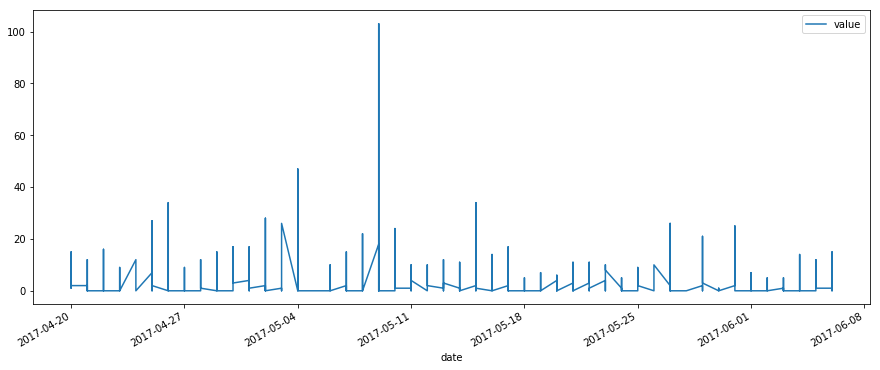

In [34]:


from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

df_plot1              = pd.DataFrame(df_stock_decrease, columns = ['timestamp', 'value'])
# Set the Date as Index
df_plot1['date']      = pd.to_datetime(df_plot1['timestamp'])
df_plot1.index        = df_plot1['date']
del df_plot1['timestamp']
del df_plot1['date']
df_plot1              = df_plot1.astype(float)

df_plot1.plot(figsize =(15, 6))
plt.show()

As we can see in the previous plot, we have identify graphically the best seller.

But in order to be more precise we would need to compute what I called the "quality" of each product. This quality is measured in terms of the stock_decrease values.

In [39]:

for i, row in df_stock_decrease.iterrows():

    df_stock_decrease.at[i, "quality"]       = float(df_stock_decrease.at[i, "value"])/46

In [40]:
df_stock_decrease

,product_id,color,timestamp,type,value,category,sub_category,main_title,colors,delta,quality
96,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-20 00:00:00,stock_decrease,2,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1,0.043478
97,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-21 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2,0.000000
98,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-22 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3,0.000000
99,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-23 00:00:00,stock_decrease,1,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4,0.021739
100,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-24 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5,0.000000
101,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-25 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6,0.000000
102,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-26 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,0.000000
103,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-27 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,0.000000
104,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-28 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8,0.000000
105,active-mens-evoknit-best-t-shirt590633,puma black--asphalt,2017-04-29 00:00:00,stock_decrease,0,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9,0.000000


In [41]:
#THE HIGHEST VALUE!
df_stock_decrease.loc[df_stock_decrease['quality'].idxmax()]

product_id                          elsu-v2-canvas-trainers359940
color                                      quiet shade-puma white
timestamp                                     2017-05-09 00:00:00
type                                               stock_decrease
value                                                         103
category        ["Shoes","Featured","Mens","Best Sellers","Sne...
sub_category    ["Shoes","Featured","Mens","Best Sellers","Sne...
main_title                            \nElsu v2 Canvas Trainers\n
colors          ["black-white","ARUBA BLUE-Puma White","white-...
delta                                                          18
quality                                                   2.23913
Name: 19002, dtype: object

So, the product with the largest stock_decrease value was the one that was picked. 

Also, we can see that this value corresponds to the highest peek of the previous curve drawn.


Now, this is fine.

But if we would like to know the first 5 best sellers we would have to do something like the following:

Note: remember that the nlargest function gets the rows of a DataFrame sorted by the n largest values of columns.

In [43]:
df_stock_decrease['quality'].nlargest(5)

19002    2.239130
21101    1.826087
5690     1.021739
20352    1.021739
36926    0.891304
Name: quality, dtype: float64

We used the stock_decrease value to identify the best seller(s) but what about the other values for type?. 

It might be useful to know how they look.

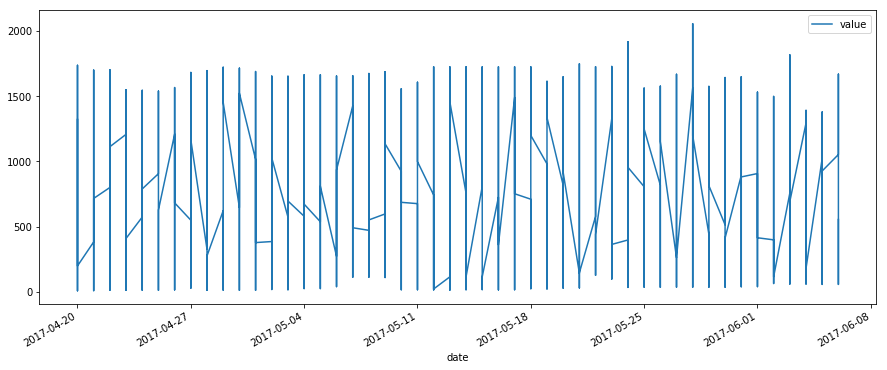

In [45]:
df_plot2              = pd.DataFrame(df_position, columns = ['timestamp', 'value'])
# Set the Date as Index
df_plot2['date']      = pd.to_datetime(df_plot2['timestamp'])
df_plot2.index        = df_plot2['date']
del df_plot2['timestamp']
del df_plot2['date']
df_plot2              = df_plot2.astype(float)

df_plot2.plot(figsize =(15, 6))
plt.show()

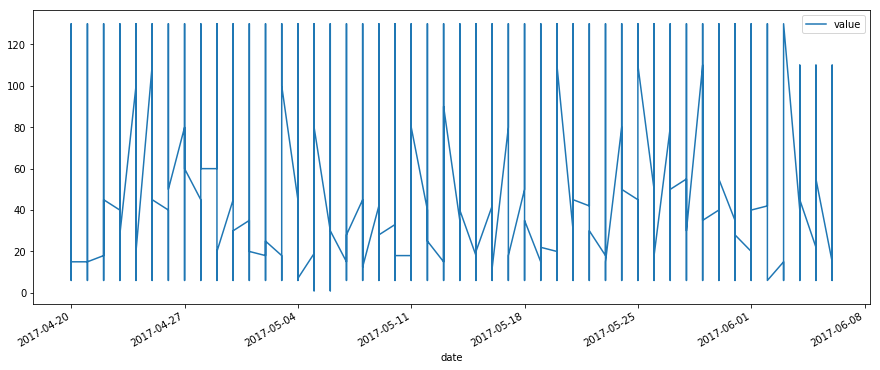

In [46]:

df_plot3              = pd.DataFrame(df_price, columns = ['timestamp', 'value'])
# Set the Date as Index
df_plot3['date']      = pd.to_datetime(df_plot3['timestamp'])
df_plot3.index        = df_plot3['date']
del df_plot3['timestamp']
del df_plot3['date']
df_plot3              = df_plot3.astype(float)

df_plot3.plot(figsize =(15, 6))
plt.show()


Unfortunately, I don't think these add much valuable information to our problem.

In [33]:
'''
df_plot4              = pd.DataFrame(df_stock_size, columns = ['timestamp', 'value'])
# Set the Date as Index
df_plot4['date']      = pd.to_datetime(df_plot4['timestamp'])
df_plot4.index        = df_plot4['date']
del df_plot4['timestamp']
del df_plot4['date']
df_plot4              = df_plot4.astype(float)

df_plot4.plot(figsize =(15, 6))
plt.show()
'''

"\ndf_plot4              = pd.DataFrame(df_stock_size, columns = ['timestamp', 'value'])\n# Set the Date as Index\ndf_plot4['date']      = pd.to_datetime(df_plot4['timestamp'])\ndf_plot4.index        = df_plot4['date']\ndel df_plot4['timestamp']\ndel df_plot4['date']\ndf_plot4              = df_plot4.astype(float)\n\ndf_plot4.plot(figsize =(15, 6))\nplt.show()\n"

In [37]:
# which are the important features for predicting the value?
# for doing this you need to create the dummy variables first
# The feature selection routines in scikit-learn will consider the dummy variables independently of each other.

In [38]:
'''
non_dummy_cols = ['value'] 
# Takes all 47 other columns
dummy_cols     = list(set(df_merged.columns) - set(non_dummy_cols))
df_dummified   = pd.get_dummies(df_merged, columns = dummy_cols)

#df_dummified   = pd.get_dummies(df_merged, drop_first = True)
'''

"\nnon_dummy_cols = ['value'] \n# Takes all 47 other columns\ndummy_cols     = list(set(df_merged.columns) - set(non_dummy_cols))\ndf_dummified   = pd.get_dummies(df_merged, columns = dummy_cols)\n\n#df_dummified   = pd.get_dummies(df_merged, drop_first = True)\n"

In [39]:
#df_dummified.describe()

In [40]:
#df_dummified.info()
#df_dummified.head()
#df_dummified.head(5)

In [41]:
'''import pandas
import numpy
from sklearn.ensemble import ExtraTreesClassifier
array = df_dummified.values
X = array[:,0:454]
Y = array[:,454]
'''

'import pandas\nimport numpy\nfrom sklearn.ensemble import ExtraTreesClassifier\narray = df_dummified.values\nX = array[:,0:454]\nY = array[:,454]\n'

In [42]:
#drop columns I wont use anymore and then rename
#df_position_value = df_position.drop(['category', 'sub_category', 'main_title', 'colors', 'color', 'timestamp', 'type'], axis = 1)

#df_position_value.columns = ['product_id', 'position']

In [43]:
#drop columns I wont use anymore and then rename
#df_price_value = df_price.drop([ 'category', 'sub_category', 'main_title', 'colors', 'color', 'timestamp', 'type'], axis = 1)

#df_price_value.columns = ['product_id', 'price']

In [44]:
#drop columns I wont use anymore and then rename
#df_stock_decrease_value = df_stock_decrease.drop([ 'category', 'sub_category', 'main_title', 'colors', 'color', 'timestamp', 'type'], axis = 1)

#df_stock_decrease_value.columns = ['product_id', 'stock_decrease']

In [45]:
#drop columns I wont use anymore and then rename
#df_stock_size_value = df_stock_size.drop([ 'category', 'sub_category', 'main_title', 'colors', 'color', 'timestamp', 'type'], axis = 1)

#df_stock_size_value.columns = ['product_id', 'stock_size']

In [46]:
#df_position_value.describe()
#df_price_value
#df_stock_decrease_value
#df_stock_size_value

In [47]:
#first_merge = pd.merge(df_merged, df_position_value, on="product_id")

In [48]:
#first_merge.describe()

In [49]:
#second_merge = pd.merge(first_merge, df_price_value, on = "new_column")

In [50]:
#thrid_merge = pd.merge(second_merge, df_stock_decrease_value, on = "new_column")

In [51]:
#fourth_merge = pd.merge(thrid_merge, df_stock_size, on = "new_column")

In [52]:
#new_df_for_model = pd.merge(df_merged, df_position_value,  on='product_id')

Now, 

we still have the "issue" with the "type and value" feature. It's about time to change it.

We are going to create a new column for each value, i.e. a column for the price, a column for the stock_decrease, a column for the stock_size and a column for the position. They'll contain the same information, but now in a column-like form.

In [47]:
df_merged

,product_id,color,timestamp,type,value,category,sub_category,main_title,colors,delta
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20 00:00:00,position,1322,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21 00:00:00,position,1134,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22 00:00:00,position,1130,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23 00:00:00,position,1136,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24 00:00:00,position,1141,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25 00:00:00,position,1136,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26 00:00:00,position,1129,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27 00:00:00,position,1135,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28 00:00:00,position,1319,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29 00:00:00,position,1144,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9


In [48]:
copy = df_merged.copy(deep = True)
for i, row in copy.iterrows():
    if str(copy.at[i, 'type']) == "position":
        copy.at[i, "position"]       = copy.at[i, 'value']
        copy.at[i, "price"]          = 0
        copy.at[i, "stock_decrease"] = 0
        copy.at[i, "stock_size"]     = 0
for i, row in copy.iterrows():
    if str(copy.at[i, 'type']) == "price":
        copy.at[i, "position"]       = 0
        copy.at[i, "price"]          = copy.at[i, 'value']
        copy.at[i, "stock_decrease"] = 0
        copy.at[i, "stock_size"]     = 0
        
for i, row in copy.iterrows():
    if str(copy.at[i, 'type']) == "stock_decrease":
        copy.at[i, "position"]       = 0
        copy.at[i, "price"]          = 0
        copy.at[i, "stock_decrease"] = copy.at[i, 'value']
        copy.at[i, "stock_size"]     = 0
        
for i, row in copy.iterrows():
    if str(copy.at[i, 'type']) == "stock_size":
        copy.at[i, "position"]       = 0
        copy.at[i, "price"]          = 0
        copy.at[i, "stock_decrease"] = 0
        copy.at[i, "stock_size"]     = copy.at[i, 'value']

Let's take a look at this new version of the dataset, with the new columns. 

Later on, we will delete the columns type and value, since we do not need them anymore.

In [51]:
copy

,product_id,color,timestamp,type,value,category,sub_category,main_title,colors,delta,position,price,stock_decrease,stock_size
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20 00:00:00,position,1322,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1,1322,0.0,0.0,0.0
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21 00:00:00,position,1134,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2,1134,0.0,0.0,0.0
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22 00:00:00,position,1130,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3,1130,0.0,0.0,0.0
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23 00:00:00,position,1136,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4,1136,0.0,0.0,0.0
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24 00:00:00,position,1141,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5,1141,0.0,0.0,0.0
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25 00:00:00,position,1136,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6,1136,0.0,0.0,0.0
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26 00:00:00,position,1129,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1129,0.0,0.0,0.0
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27 00:00:00,position,1135,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1135,0.0,0.0,0.0
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28 00:00:00,position,1319,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8,1319,0.0,0.0,0.0
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29 00:00:00,position,1144,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9,1144,0.0,0.0,0.0


In [52]:
df_values_for_model = copy.drop(['type', 'value'], axis = 1)

In [38]:
'''
create a new column that tells you if something is best seller(1) or no(0).

'''

'\ncreate a new column that tells you if something is best seller(1) or no(0).\n\n'

In [54]:
df_values_for_model['timestamp']      = pd.to_datetime(df_values_for_model['timestamp'])


In [55]:
df_values_for_model


,product_id,color,timestamp,category,sub_category,main_title,colors,delta,position,price,stock_decrease,stock_size
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1,1322,0.0,0.0,0.0
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2,1134,0.0,0.0,0.0
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3,1130,0.0,0.0,0.0
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4,1136,0.0,0.0,0.0
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5,1141,0.0,0.0,0.0
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6,1136,0.0,0.0,0.0
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1129,0.0,0.0,0.0
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1135,0.0,0.0,0.0
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8,1319,0.0,0.0,0.0
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9,1144,0.0,0.0,0.0


In [43]:
df_values_for_model.head(29)

,product_id,color,timestamp,category,sub_category,main_title,colors,delta,position,price,stock_decrease,stock_size
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1,1322,0.0,0.0,0.0
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2,1134,0.0,0.0,0.0
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3,1130,0.0,0.0,0.0
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4,1136,0.0,0.0,0.0
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5,1141,0.0,0.0,0.0
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6,1136,0.0,0.0,0.0
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1129,0.0,0.0,0.0
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1135,0.0,0.0,0.0
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8,1319,0.0,0.0,0.0
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9,1144,0.0,0.0,0.0


FOLLOW THE SAME PRINCIPLE


We wanted to follow the same idea as for identifying the best-seller(s), so we'll try to calculate this using an external csv file in which the total of stuck_size and stock_decrease have been computed for every product.

In this way we will be able to know what is the net value for  the stock_decrease and stock_size for each product.

In [56]:
# this is for the producing a new csv file
#df_values_for_model.to_clipboard(sep=',')

In [57]:
#f = open("filename", 'a') # Open file as append mode
#df_values_for_model.to_csv(f, header = False)
#f.close()

In [58]:
df_total_stocks       = pd.read_csv('stocks_totals.csv')

In [59]:
df_total_stocks


,product_id,SUM of stock_size,SUM of stock_decrease
0,active-mens-evoknit-best-t-shirt590633,1587,14
1,active-mens-evostripe-spaceknit-t-shirt590624,7082,48
2,active-mens-woven-shorts838271,1776,34
3,active-no.1-logo-mens-t-shirt838388,1621,79
4,active-training-mens-reps-woven-graphic-shorts...,1555,7
5,active-training-womens-all-eyes-on-me-3%2F4-ti...,7854,150
6,active-training-womens-top515058,296,23
7,afc-mens-training-jersey749753,8688,101
8,afc-training-shorts749751,656,58
9,archive-logo-mens-t-shirt571513,3267,237


In here we add these two columns for to create a new version of the dataframe.

In [60]:
for i, row in df_values_for_model.iterrows():
    for j, wor in df_total_stocks.iterrows():
        if str(df_values_for_model.at[i, 'product_id'])==str(df_total_stocks.at[j, 'product_id']):
            df_values_for_model.at[i, "stock_decrease_total"] = df_total_stocks.at[j, 'SUM of stock_decrease']
            df_values_for_model.at[i, "stock_size_total"] = df_total_stocks.at[j, 'SUM of stock_size']

In [61]:
_df_values_for_model = df_values_for_model.copy(deep = True)

Let's take a look at the dataset that we've created so far.

In [63]:
_df_values_for_model

,product_id,color,timestamp,category,sub_category,main_title,colors,delta,position,price,stock_decrease,stock_size,stock_decrease_total,stock_size_total
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1,1322,0.0,0.0,0.0,14.0,1587.0
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2,1134,0.0,0.0,0.0,14.0,1587.0
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3,1130,0.0,0.0,0.0,14.0,1587.0
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4,1136,0.0,0.0,0.0,14.0,1587.0
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5,1141,0.0,0.0,0.0,14.0,1587.0
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6,1136,0.0,0.0,0.0,14.0,1587.0
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1129,0.0,0.0,0.0,14.0,1587.0
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1135,0.0,0.0,0.0,14.0,1587.0
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8,1319,0.0,0.0,0.0,14.0,1587.0
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9,1144,0.0,0.0,0.0,14.0,1587.0


Again, we will comput a "quality" value for every product and we will add this information for our dataframe.

In here, the quality value will be colinear with the stock_decrease and stock_size, but it will be inversely correlated with the delta time value.

In [65]:

for i, row in _df_values_for_model.iterrows():

    _df_values_for_model.at[i, "quality"]       = float(_df_values_for_model.at[i, "stock_decrease_total"])*float(_df_values_for_model.at[i, "stock_size_total"])/float(_df_values_for_model.at[i, "delta"])

In [66]:
_df_values_for_model

,product_id,color,timestamp,category,sub_category,main_title,colors,delta,position,price,stock_decrease,stock_size,stock_decrease_total,stock_size_total,quality
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1,1322,0.0,0.0,0.0,14.0,1587.0,22218.000000
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2,1134,0.0,0.0,0.0,14.0,1587.0,11109.000000
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3,1130,0.0,0.0,0.0,14.0,1587.0,7406.000000
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4,1136,0.0,0.0,0.0,14.0,1587.0,5554.500000
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5,1141,0.0,0.0,0.0,14.0,1587.0,4443.600000
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6,1136,0.0,0.0,0.0,14.0,1587.0,3703.000000
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1129,0.0,0.0,0.0,14.0,1587.0,3174.000000
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1135,0.0,0.0,0.0,14.0,1587.0,3174.000000
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8,1319,0.0,0.0,0.0,14.0,1587.0,2777.250000
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9,1144,0.0,0.0,0.0,14.0,1587.0,2468.666667


So, now that we have all the quality information about the products, we'll trace a threshold  with a value (depending on how you define the quality and the amount of quality the user would like to have this value can change).

If the quality is bigger than this threshold, then the product will be classified as best seller, otherwise it will not.

In [67]:
threshold = 20500

Let's call it "y", as traditionally it's called in Machine Learning.

In [69]:

for i, row in _df_values_for_model.iterrows():
    if int(_df_values_for_model.at[i, "quality"]) > threshold:
        _df_values_for_model.at[i, "y"]       = 1 # it means it's a good seller. True
    else:
        _df_values_for_model.at[i, "y"]       = 0 # it means it's a bad seller. False

In [70]:
_df_values_for_model

,product_id,color,timestamp,category,sub_category,main_title,colors,delta,position,price,stock_decrease,stock_size,stock_decrease_total,stock_size_total,quality,y
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1,1322,0.0,0.0,0.0,14.0,1587.0,22218.000000,1.0
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2,1134,0.0,0.0,0.0,14.0,1587.0,11109.000000,0.0
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3,1130,0.0,0.0,0.0,14.0,1587.0,7406.000000,0.0
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4,1136,0.0,0.0,0.0,14.0,1587.0,5554.500000,0.0
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5,1141,0.0,0.0,0.0,14.0,1587.0,4443.600000,0.0
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6,1136,0.0,0.0,0.0,14.0,1587.0,3703.000000,0.0
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1129,0.0,0.0,0.0,14.0,1587.0,3174.000000,0.0
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1135,0.0,0.0,0.0,14.0,1587.0,3174.000000,0.0
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8,1319,0.0,0.0,0.0,14.0,1587.0,2777.250000,0.0
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9,1144,0.0,0.0,0.0,14.0,1587.0,2468.666667,0.0


Since we've been adding features to our dataframe, it's important to study the possibility of introducing bias to our problem.

Bias is bad issue for machine learning processes. It can be detected by studying correlation between features and out "y" value.

/home/fernsndo/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd4e535e10>,
      dtype=object)

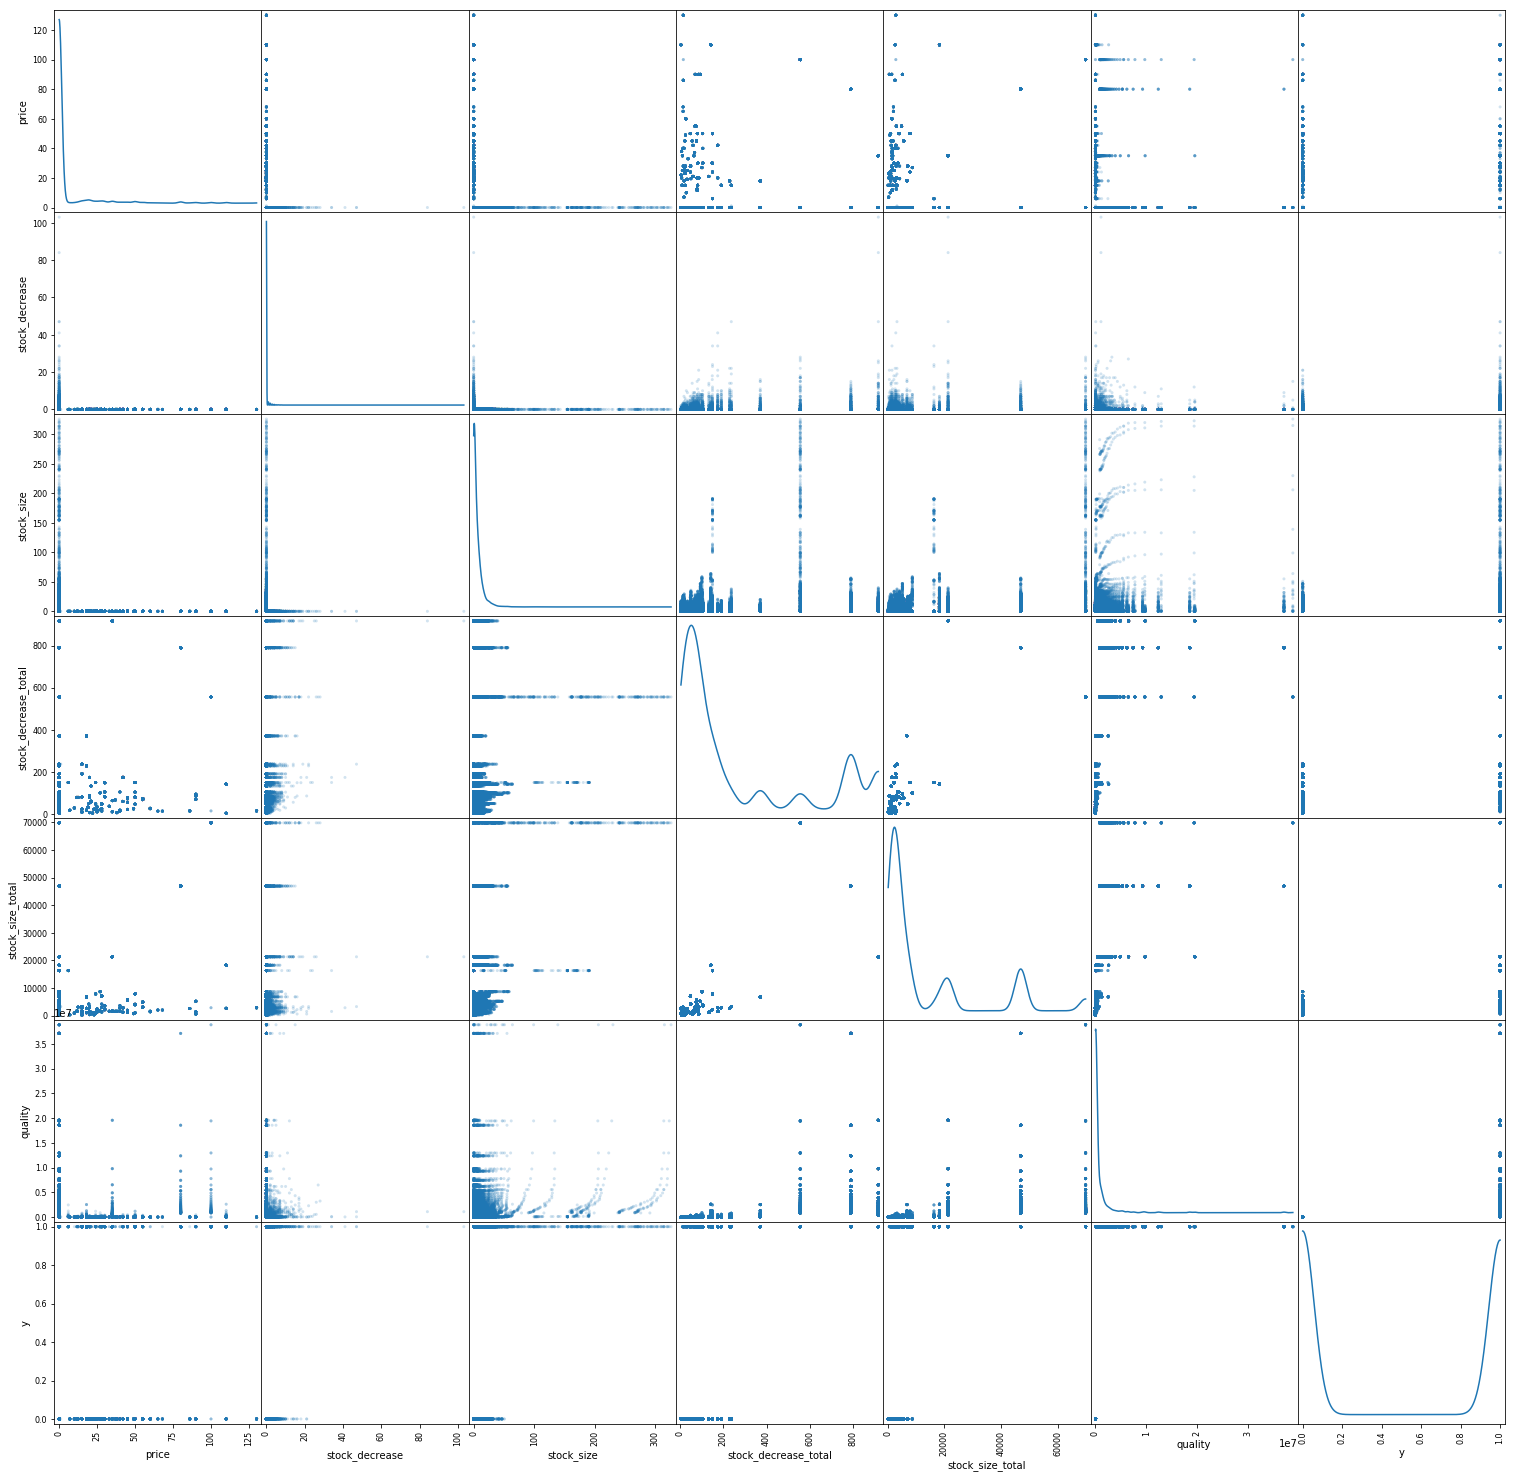

In [74]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['delta','position', 'price', 'stock_decrease', 'stock_size', 'stock_decrease_total', 'stock_size_total', 'quality']
X = _df_values_for_model[feature_names]
y = _df_values_for_model['y']

cmap = cm.get_cmap('gnuplot')
scatter_matrix(_df_values_for_model, alpha=0.2, figsize=(26, 26), diagonal='kde')
#scatter = pd.scatter_matrix(X, y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
#plt.suptitle('Scatter-matrix for each input variable')


Fortunately enough, we do not have any strong correlations between features, so we can keep going forward.

Now, we have reached a point in where we need to start think about the data that we have and how we defined our problem.

Part of our dataset is composed by categorical features. 

It's a common practice in Machine Learning to treat the categorical data with dummy variables. 

Dummy coding is a commonly used method for converting a categorical input variable into continuous variable. 'Dummy', as the name suggests is a duplicate variable which represents one level of a categorical variable. Presence of a level is represent by 1 and absence is represented by 0.

In [71]:
# dummification
# Refine the data for the consumption of ML algorithms.

In [75]:
_df_values_for_model

,product_id,color,timestamp,category,sub_category,main_title,colors,delta,position,price,stock_decrease,stock_size,stock_decrease_total,stock_size_total,quality,y
0,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-20,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",1,1322,0.0,0.0,0.0,14.0,1587.0,22218.000000,1.0
1,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-21,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",2,1134,0.0,0.0,0.0,14.0,1587.0,11109.000000,0.0
2,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-22,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",3,1130,0.0,0.0,0.0,14.0,1587.0,7406.000000,0.0
3,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-23,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",4,1136,0.0,0.0,0.0,14.0,1587.0,5554.500000,0.0
4,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-24,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",5,1141,0.0,0.0,0.0,14.0,1587.0,4443.600000,0.0
5,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-25,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",6,1136,0.0,0.0,0.0,14.0,1587.0,3703.000000,0.0
6,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-26,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1129,0.0,0.0,0.0,14.0,1587.0,3174.000000,0.0
7,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-27,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",7,1135,0.0,0.0,0.0,14.0,1587.0,3174.000000,0.0
8,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-28,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",8,1319,0.0,0.0,0.0,14.0,1587.0,2777.250000,0.0
9,active-mens-evoknit-best-t-shirt590633,Puma Black--Asphalt,2017-04-29,"[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...","[""New Arrivals"",""Featured"",""Mens"",""Clothing"",""...",\nActive Men's evoKNIT Best T-Shirt\n,"[""QUIET SHADE--white"",""Puma Black--Asphalt""]",9,1144,0.0,0.0,0.0,14.0,1587.0,2468.666667,0.0


In [71]:
def dummies(df, column):
    df = pd.get_dummies(df[column]).astype(float)
    df.columns = [column + '_' + s for s in df.columns]
    return df



In [76]:
non_dummy_cols = ['y', 'delta', 'position', 'price', 'stock_decrease', 'stock_size', 'stock_decrease_total', 'stock_size_total', 'quality'] 
# Takes all 47 other columns
dummy_cols     = list(set(_df_values_for_model.columns) - set(non_dummy_cols))
dummified_dataset   = pd.get_dummies(_df_values_for_model, columns = dummy_cols)



In [78]:
dummified_dataset

,delta,position,price,stock_decrease,stock_size,stock_decrease_total,stock_size_total,quality,y,"category_[""Best Sellers"",""Mens"",""Featured"",""Sweatshirts \u0026 Hoodies"",""New Arrivals"",""Clothing""]",...,"sub_category_[""Sports"",""Shop the Look"",""Sports Bras"",""Featured"",""New Arrivals"",""Womens"",""Clothing""]","sub_category_[""T-Shirts \u0026 Tops"",""Clothing"",""Mens""]","sub_category_[""T-Shirts \u0026 Tops"",""Mens"",""BVB"",""Featured"",""New Arrivals"",""Sports"",""Clothing""]","sub_category_[""T-Shirts \u0026 Tops"",""Mens"",""Bolt Collection"",""Featured"",""New Arrivals"",""Clothing""]","sub_category_[""T-Shirts \u0026 Tops"",""Sports"",""Featured"",""New Arrivals"",""Womens"",""Clothing""]","sub_category_[""Wallets"",""Accessories"",""Mens""]","sub_category_[""Womens"",""Clothing"",""Sweatshirts \u0026 Hoodies""]","sub_category_[""Womens"",""Clothing"",""T-Shirts \u0026 Tops""]","sub_category_[""Womens"",""Shoes"",""Featured"",""Shop the Look"",""Best Sellers"",""Sneakers"",""New Arrivals"",""PUMA Classics"",""Mens""]","sub_category_[""Womens"",""Sneakers"",""Shoes""]"
0,1,1322,0.0,0.0,0.0,14.0,1587.0,22218.000000,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1134,0.0,0.0,0.0,14.0,1587.0,11109.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1130,0.0,0.0,0.0,14.0,1587.0,7406.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1136,0.0,0.0,0.0,14.0,1587.0,5554.500000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1141,0.0,0.0,0.0,14.0,1587.0,4443.600000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1136,0.0,0.0,0.0,14.0,1587.0,3703.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,1129,0.0,0.0,0.0,14.0,1587.0,3174.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,1135,0.0,0.0,0.0,14.0,1587.0,3174.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,1319,0.0,0.0,0.0,14.0,1587.0,2777.250000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,1144,0.0,0.0,0.0,14.0,1587.0,2468.666667,0.0,0,...,0,0,0,0,0,0,0,0,0,0


Now we care about the machine learning algorithm. 

Since it is a classification problem, we'll use LogisticRegression for our model.

In [81]:
#Create array from data values

array = dummified_dataset.values

#Split the data into input and target

X = array[:,0:493]

Y = array[:,493]

Y = Y.astype('int')

Before going any further we need to select the important features in our problem. This is normally done with some feature selection techniques. 

We'll address this problem with SelectPercentile offered in sklearn. We'll also use cross-validation.

Remembering that Cross-validation is 

a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples.

In [82]:


from sklearn.feature_selection import SelectKBest
#We will select the features using chi square
from sklearn.feature_selection import chi2
from sklearn.cross_validation import train_test_split # use cross validation for feature selection
from sklearn.feature_selection import SelectPercentile


#test = SelectKBest(score_func=chi2, k=4)

#Fit the function for ranking the features by score

#fit = test.fit(X, Y)

#Summarize scores numpy.set_printoptions(precision=3) print(fit.scores_)

#Apply the transformation on to dataset

#features = fit.transform(X)

#Summarize selected features print(features[0:5,:])

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = .5)
select                           = SelectPercentile(percentile = 50)
select.fit(X_train, y_train)
X_train_selected                 = select.transform(X_train)

/home/fernsndo/.local/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/fernsndo/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[False False  True False  True  True  True  True  True  True False  True
  True  True False False False  True False False  True  True  True False
  True False  True  True  True  True  True False False False  True  True
  True False  True  True  True  True  True  True False False  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True False  True False  True  True False False
 False False  True  True False  True  True  True  True  True  True  True
  True  True  True  True False False False  True  True False  True False
 False False False  True  True False  True  True  True False False  True
 False False False  True  True  True  True False False  True False  True
 False  True  True  True  True  True False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  T

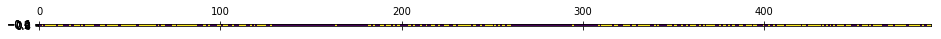

In [83]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1))

In [84]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)
logreg          = LogisticRegression()
logreg.fit(X_train, y_train)
print("the score of logistic regression on all features: {:.3f}".format(logreg.score(X_test, y_test)))

logreg.fit(X_train_selected, y_train)

print("the score of logistic regression on the selected features: {:.3f}".format(logreg.score(X_test_selected, y_test)))


the score of logistic regression on all features: 0.990
the score of logistic regression on the selected features: 0.990


So, the feature selection did not reduce more the precision of our algorithm, but we will keep the reduced features since they provide a simpler model.

Finally, we measure conclude the accuracy of our model.

In [89]:
from sklearn.metrics import accuracy_score
predictions = logreg.predict(X_test_selected)
print("Accuracy: %.3f" % accuracy_score(y_test, predictions))

Accuracy: 0.990
